# Starting data science!

Data science usually starts from some <b>data</b> and some <b>business question</b>. Let's start with a very basic question: what will be my total sales in the near future?

## Some data, for now very basic

To keep things very simple (and naïve) we will consider monthly sales in $ of the last N months as input data.

In [1]:
monthly_data_2013 = [100, 90, 120, 140, 180, 200, 190, 208, 212]

Remember: this is a regular Python list. Try the following and later try it again later with a NumPy array. For lists, the "*" operator does replication, in NumPy is a vectorized operation.

In [2]:
len(monthly_data_2013 * 10)

90

## A look at the data

The first thing to do with data is taking a look at it. In our case, we will start by plotting it.

/Users/msicilia/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


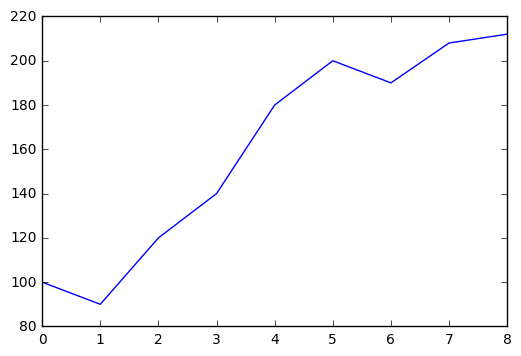

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(monthly_data_2013)

Now we convert the data to a NumPy array. NumPy arrays are more efficient (but this will not be appreciable for the small data we use here), but they also provide a large number of interesting functions. This is because they are <b>homogeneous</b> and use their own <b>basic data types</b>.

In [4]:
import numpy as np
print type(monthly_data_2013)
monthly_data_2013 = np.array(monthly_data_2013)
print type(monthly_data_2013)


<type 'list'>
<type 'numpy.ndarray'>


You can also initialize NumPy arrays using a number of functions like np.arange, np.ones, np.zeros or np.empty

In [5]:
print monthly_data_2013.dtype

int64


In [6]:
print monthly_data_2013.max()
print monthly_data_2013.mean()


212
160.0


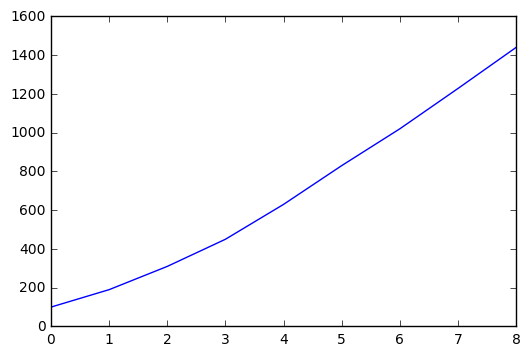

In [7]:
cumulative = monthly_data_2013.cumsum()
plt.plot(cumulative)

## A basic forecast using regression

It looks that the sales might be approximated by a linear function, so let's try with linear regression as implemented in <a href="http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.linregress.html">scipy.stats.linregress</a>.

In [8]:
from scipy.stats import linregress
x = range(len(monthly_data_2013))
slope, intercept, r_value, p_value, std_err = linregress(x, monthly_data_2013)


In [9]:
print slope, intercept, r_value, p_value, std_err

16.7 93.2 0.953429957145 6.85616306195e-05 1.99678312722


In [10]:
def sales(slope, intercept, x):
    return slope*x + intercept

Now if we want to see our future sales in three months, we can simply do the following.

In [11]:
print sales(slope, intercept, len(monthly_data_2013)+3)

293.6


And we can draw the function

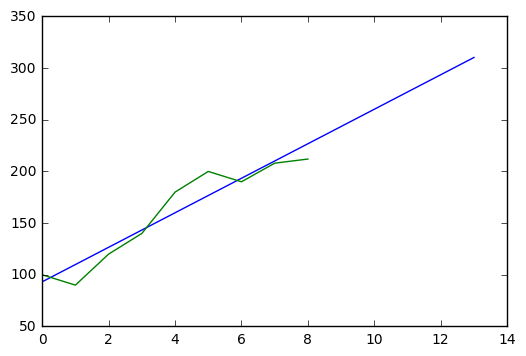

In [12]:
x = np.arange(len(monthly_data_2013)+5)
y = [sales(slope, intercept, v)  for v in x]
plt.plot(x,y)
plt.plot(monthly_data_2013)

*NOTE:* Of course, this model is really a naïve one. It only accounts for time, so it is lacking all the variables that are needed in marketing, and does not consider seasonality as it should. However, it servers as a "minimalistic" example to get a first idea of the tasks and outcomes of interactive data science.

## Simulating sales increase

NumPy provides vectorized operations, so for example:

In [13]:
monthly_data_2014 =  monthly_data_2013*1.05
print monthly_data_2014
print monthly_data_2014.dtype

[ 105.    94.5  126.   147.   189.   210.   199.5  218.4  222.6]
float64


Then we can convert to integer volumen of sales.

In [14]:
monthly_data_2014 = monthly_data_2014.astype(np.int16)
print monthly_data_2014

[105  94 126 147 189 210 199 218 222]


<b>Vectorized operations</b> are batch operations on NumPy arrays where you don't neet to write any for loops.

In [15]:
monthly_data_2015 = monthly_data_2014 *0.8
print monthly_data_2015

[  84.    75.2  100.8  117.6  151.2  168.   159.2  174.4  177.6]


You can also use random numbers and add them via vectorized operations.

In [16]:
monthly_data_2015 += np.random.randint(0, 10, monthly_data_2015.size)
print monthly_data_2015

[  91.    84.2  109.8  124.6  160.2  176.   163.2  182.4  185.6]


## Evaluating the model

The first parameter is r-squared, which is 1 in models with a perfect fit. Standard error (s) is relatively small, which says that the observations are close to the fitted line. Finally, the p-value is very small, indicating that the model is significative.

But what about trying with other data?

In [17]:
monthly_data_2012 = [80, 200, 90, 170, 150, 140, 79, 200]

4.34523809524 123.416666667 0.209860695661 0.617911776974 8.26468607409


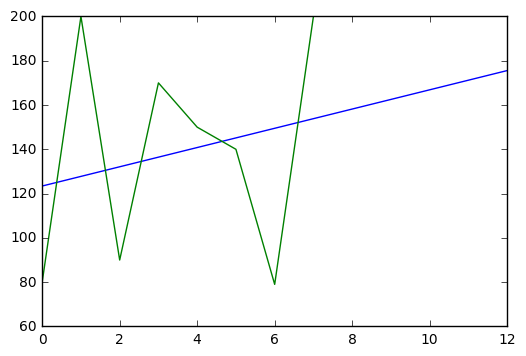

In [18]:
x2 = range(len(monthly_data_2012))
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(x2, monthly_data_2012)
print slope2, intercept2, r_value2, p_value2, std_err2
x2 = np.arange(len(monthly_data_2012)+5)
y2 = [sales(slope2, intercept2, v)  for v in x2]
plt.plot(x2,y2)
plt.plot(monthly_data_2012)

What do the parameters say about the model? 

## Sales per region

We can represent multi-dimensional data in NumPy

In [19]:
# Each sublist represents sales in the same month. 
# for three regions, one per column.
monthly = [[100, 50, 87],[120, 38, 78],[150, 48, 37]] 
monthly_data_2008 = np.array(monthly)
print monthly_data_2008
print monthly_data_2008.shape

[[100  50  87]
 [120  38  78]
 [150  48  37]]
(3, 3)


Indexing works like in Python sequences, but it is important to know that <b>creates views, not copies!</b>. This is an important difference for performance reasons with large arrays.

In [20]:
m2_some_regions =  monthly_data_2008[1, 1:3]
print m2_some_regions
m2_some_regions += 1
print monthly_data_2008

[38 78]
[[100  50  87]
 [120  39  79]
 [150  48  37]]


You can get the sales of a particular region (column) by indexing.

In [21]:
monthly_data_2008[:,1]

array([50, 39, 48])

One can obtain boolean NumPy arrays by using conditions.

In [22]:
good_ones = monthly_data_2008 > 50
print good_ones

[[ True False  True]
 [ True False  True]
 [ True False False]]


Then you can use these arrays to index arrays!

In [23]:
monthly_data_2008[good_ones]

array([100,  87, 120,  79, 150])

We can get total sales by adding by rows. This uses **list comprehensions** check what they are here: https://docs.python.org/2/tutorial/datastructures.html

In [24]:
monthly_data_2008_totals = [month.sum() for month in monthly_data_2008]
print monthly_data_2008_totals

[237, 238, 235]


We can get sales per region

In [25]:
monthly_data_2008_regions = [monthly_data_2008[:,region].sum() 
 for region in range(monthly_data_2008.shape[1])]
print monthly_data_2008_regions

[370, 137, 203]


In [26]:
monthly_data_2008_regions.sort()
print monthly_data_2008_regions

[137, 203, 370]
